# Projeto Final - Fundamentos de Data Science I - Naufrágio do Titanic

Para o projeto final, será realizada uma análise a partir de documento disponibilizado acerca dos sobreviventes do návio Titanic. Neste trabalho, utilizaremos principalmente o Pandas, NumPy e o Matplotlib para responder às perguntas que mais interessam e criar um relatório compartilhando com as respostas. 

## 1. Bibliotecas

In [104]:
# Comando para importação do pandas, que será utilizado para melhor manusear os dados advindos do arquivo CSV.
import pandas as pd
# Importação do numpy para integração eficiente na análise dos dados.
import numpy as np
# Importação das bibliotecas matplotlib e seaborn, estes encarregados de transpor os dados colhidos em gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Importação e avaliação dos dados
Utilizar-se-á o pandas para importação dos dados consignados no arquivo CSV. Desta forma, é possível aferir, de plano, quais são os conjuntos de dados consignados no dataframe, estes objetos das perguntas a serem formuladas no processo conseguinte. Relevante, ainda, aferir acerca de dados gerais (estatísticos) que auxiliarão neste processo.

In [4]:
#Importação do dataframe e avaliação dos dados
df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Perguntas
Em conformidade com os dados pré-analisados, passa-se ao processo de brainstorm, com o intuito de formular perguntas relevantes acerca do fatores de sobrevivência dos passageiros.
No conjunto de dados disponíveis, percebe que a análise pode ser realizada através de três agrupamentos:
* Pessoal: sex (Sexo do passsageiro) e age (Idade do passageiro)
* Familiar: sibsp (Número de irmãos e esposas abordo do návio) e parch (Número de pais e filhos abordo do návio)
* Ecônomico: pclass (Categoria da passagem) e Fare (Custo da passagem)

Assim sendo, dentre os fatores mais relevantes, se torna possível a elaboração das perguntas destacadas a seguir:

1) O fator sexo tem correlação com uma taxa maior de sobrevivência do passageiro?

2) Passageiros com idades mais avançadas possuíram um índice maior de sobrevivência do que passageiros mais jovens?

3) A classe da passagem resultou em uma chance maior de sobrevivência em comparação com os passageiros que possuíam passagens de classe menor?

## 4. Limpeza dos dados

In [6]:
# Inicialmente, serão convertidos os índices para letras mínusculas, a fim de facilitar futuras referências.
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Descartaremos as colunas que não serão utilizadas para as perguntas elaboradas.
df.drop(['ticket', 'cabin', 'fare', 'embarked'], axis=1, inplace=True)

# Em razão da coluna Age possuir diversos dados sem preenchimento, utilizaremos a média dos valores para resolver este impasse.
df['age'].fillna(df['age'].mean(), inplace=True)

# Salvando o dataframe com as alterações realizadas.
df.to_csv('df_clean.csv', index=False)

## 5. Análise

In [7]:
# Para iniciar a análise, abriremos o dataframe com as modificações realizadas.
df_titanic = pd.read_csv('df_clean.csv')

## 1 - O fator sexo tem correlação com uma taxa maior de sobrevivência do passageiro?

Para respondermos a primeira pergunta, necessitamos descobrir a quantidade de homens e mulheres existentes no návio.

In [8]:
print("Homens: {}\nMulheres: {}".format(sum(df_titanic['sex'] == 'male'), sum(df_titanic['sex'] == 'female')))

Homens: 577
Mulheres: 314


In [9]:
#Criação de data frames separados para melhor consulta de dados específicos
df_alive = df_titanic.query('survived == "1"')
df_rip = df_titanic.query('survived == "0"')

Agora, separaremos os gêneros entre sobreviventes e não sobreviventes para melhor compreender a resposta.

In [10]:
#Percepção numérica acerca dos dados
print("Homens sobreviventes: {}\nMulheres sobreviventes: {}".format(sum(df_alive['sex'] == 'male'), sum(df_alive['sex'] == 'female')))
print("Homens não sobreviventes: {}\nMulheres não sobreviventes: {}".format(sum(df_rip['sex'] == 'male'), sum(df_rip['sex'] == 'female')))

Homens sobreviventes: 109
Mulheres sobreviventes: 233
Homens não sobreviventes: 468
Mulheres não sobreviventes: 81


Por fim, serão plotados os gráficos para uma visualização dos dados colhidos.

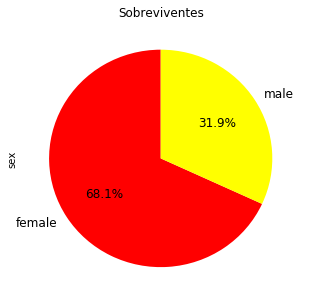

In [11]:
#Plotagem do gráfico em relação aos sobreviventes.
df_alive['sex'].value_counts().plot(kind='pie', figsize=(5,5), colors=['r', 'yellow'], title='Sobreviventes', fontsize=12, autopct='%1.1f%%', startangle=90);

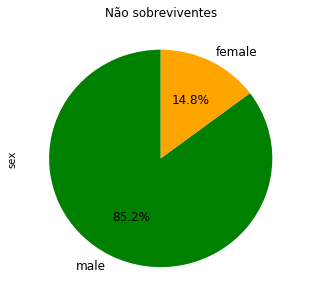

In [12]:
#Plotagem do gráfico em relação aos não sobreviventes.
df_rip['sex'].value_counts().plot(kind='pie', figsize=(5,5), colors=['g', 'orange'], title='Não sobreviventes', fontsize=12, autopct='%1.1f%%', startangle=90);

Percebemos, desta forma, que dentre os passageiros catalogados, foram as mulheres que tiveram uma maior propensão a sobreviver.

## 2- Passageiros idosos possuíram um índice maior de sobrevivência do que passageiros mais jovens?

Na sequência, realizaremos a análise acerca da segunda pergunta do nosso questionário.

Como no processo anterior, já criamos um dataframe específico para os sobreviventes, será realizado a análise gráfica de forma direta, com o intuito de verificar se os passageiros idosos tiveram um índice maior de sobrevivência dos que os mais jovens.

Text(0.5,1,'Faixas de idade')

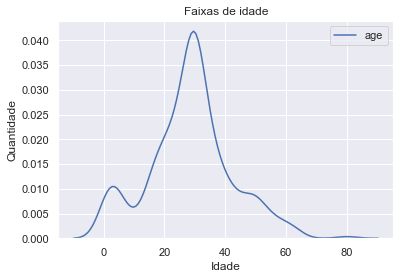

In [105]:
#Plotagem do gráfico em relação as faixas de idade
sns.kdeplot(df_alive["age"][(df_alive["survived"] == 1)])
sns.set(rc={'figure.figsize':(5,5)})
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.title('Faixas de idade')

Text(0.5,1,'Faixas de idade')

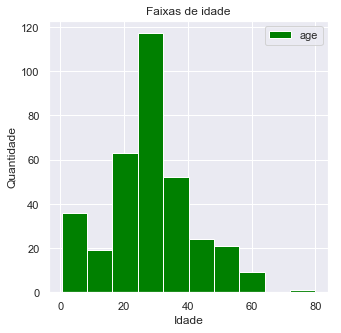

In [14]:
#Plotagem de um gráfico em barras sobre as faixas de idade.
df_alive.plot(kind='hist', y='age', title='Frequecia Idade', color='green', figsize=(5,5))
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Faixas de idade')

É possível denotar, neste caso, que a faixa de pessoas idosas (entre 60 a 80 anos) possuíram uma margem ínfima de sobrevivência quando em cotejo as faixas de crianças(0 a 10 anos), adolescentes e adultos(20-59 anos). Assim sendo, responderiamos negativamente o objeto de questionamento.

## 3 - Passageiros de classes maiores possuíram um índice melhor de sobrevivência em comparação com os passageiros que possuíam passagens de classe menor?

In [183]:
#Total de passageiros por classe:
print('1ª classe: {}'.format(sum(df_titanic['pclass'] == 1)))
print('2ª classe: {}'.format(sum(df_titanic['pclass'] == 2)))
print('3ª classe: {}'.format(sum(df_titanic['pclass'] == 3)))

1ª classe: 216
2ª classe: 184
3ª classe: 491


In [15]:
#Categorização dos passageiros no návio por sobreviventes e classes:
df_class = df[['passengerid', 'survived', 'pclass']].groupby(['survived', 'pclass'])
df_class.describe()

passengerid                                               \
                      count        mean         std   min     25%    50%   
survived pclass                                                            
0        1             80.0  410.300000  252.655587   7.0  174.00  437.0   
         2             97.0  452.123711  257.771065  21.0  229.00  414.0   
         3            372.0  453.580645  263.090509   1.0  206.75  470.0   
1        1            136.0  491.772059  239.006988   2.0  307.75  510.5   
         2             87.0  439.080460  244.211937  10.0  254.00  441.0   
         3            119.0  394.058824  264.680245   3.0  169.50  359.0   

                                
                    75%    max  
survived pclass                 
0        1       608.75  873.0  
         2       686.00  887.0  
         3       679.50  891.0  
1        1       693.50  890.0  
         2       612.50  881.0  
         3       633.50  876.0

In [98]:
#Porcentagem de sobreviventes em cada uma das classes:
class_total_one = sum(df_titanic['pclass'] == 1)
class_total_two = sum(df_titanic['pclass'] == 2)
class_total_three = sum(df_titanic['pclass'] == 3)

class_one = df_alive.groupby('pclass')['survived'].count()[1]
class_two = df_alive.groupby('pclass')['survived'].count()[2]
class_three = df_alive.groupby('pclass')['survived'].count()[3]

c1 = ((class_one/class_total_one)*100).astype(int)
c2 = ((class_two/class_total_two)*100).astype(int)
c3 = ((class_three/class_total_three)*100).astype(int)

print('Sobreviventes da 1ª Classe: {}%\nSobreviventes da 2ª Classe: {}%\nSobreviventes da 3ª Classe: {}%'.format(c1, c2, c3))

Sobreviventes da 1ª Classe: 62%
Sobreviventes da 2ª Classe: 47%
Sobreviventes da 3ª Classe: 24%


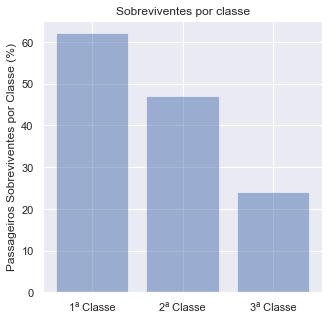

In [103]:
#Plotagem do gráfico dos sobreviventes separados por classes dos bilhetes.
objects = ('1ª Classe', '2ª Classe', '3ª Classe')
y_pos = np.arange(len(objects))
scale = (c1, c2, c3)


plt.bar(y_pos, scale, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Passageiros Sobreviventes por Classe (%)')
plt.title('Sobreviventes por classe')

plt.show()

## Considerações Finais

Dentre os dados analisados neste projeto foi possível denotar:

* O número de mulheres sobreviventes (68,1%) foi maior em relação aos homens (31,9%);
* Os passageiros idosos possuíram uma pequena chance de sobrevivência em relação as demais faixas de idade;
* Dentre as três classes de bilhetes existentes, os passageiros que possuiam bilhetes de classe superior(Classe 1) tiveram uma margem de 67% de sobreviventes, enquanto, passageiros com bilhetes de classes inferiors (Classes 2 e 3), possuíram uma margem de 47% e 24% de sobreviventes, respectivamente. Levando a crer que aqueles com maiores posses possuíram mais recursos de sobrevivência que os demais.


## Limitações

Neste projeto, alcançamos respostas aproximadas para perguntas sucitadas, isso se dá em razão de que, para uma completitude e maior precisão da análise, necessário se faz que o preenchimento completo de determinados dados. A título de exemplo, cita-se que a coluna *Age* possui muitas lacunas (estas resolvidas através da utilização da media), bem assim quanto às colunas *Embarked* e *Cabin*, o que torna as respostas discutíveis por certa margem.

## Bibliografia
https://www.kaggle.com/c/titanic/data

https://www.kaggle.com/c/titanic/discussion/82206

https://pythonspot.com/matplotlib-bar-chart/

http://www.numpy.org/

https://seaborn.pydata.org/

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

